### Classification model using SVM for salary data( predict wether Salary person is <=50K or >50K  
<li>SalaryData_Train.csv</li>
<li>SalaryData_Test.csv</li>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#Reading dataset file using pandas function & showing top 5 records
df_before = pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\svm\\SalaryData_Train.csv')
df_before.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Value counts of Salary col <=50K or >50K
df_before['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [4]:
#Actual shape of dataset
df_before.shape

(30161, 14)

In [5]:
#Shows the statistiscal calculation of dataset
df_before.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Check the null values in data
df_before.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
#Shows general info about dataset as Columns, Counts & Dtypes
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
#Unique categories inside 'education' feature 
df_before['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [9]:
#Unique categories inside 'workclass' feature 
df_before['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [10]:
#Unique categories inside 'maritalstatus' feature 
df_before['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
#Unique categories inside 'occupation' feature 
df_before['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
#Unique categories inside 'relationship' feature 
df_before['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
#Unique categories inside 'native' feature 
df_before['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

#### Note: Above 6 features given unique categorical values & by the help of we can draw much visualizations   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001823B936D30>]],
      dtype=object)

<Figure size 1440x72 with 0 Axes>

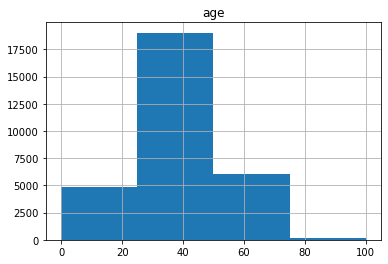

In [14]:
#Visualization of histogram plot
fig = plt.figure(figsize=(20,1))
df_before.hist(column=['age'], bins = [0,25,50,75,100])

Simple diagram shows all info about age variations of people as ex. age between 25-50 is nearly 19000. Rest can be seen clearly.

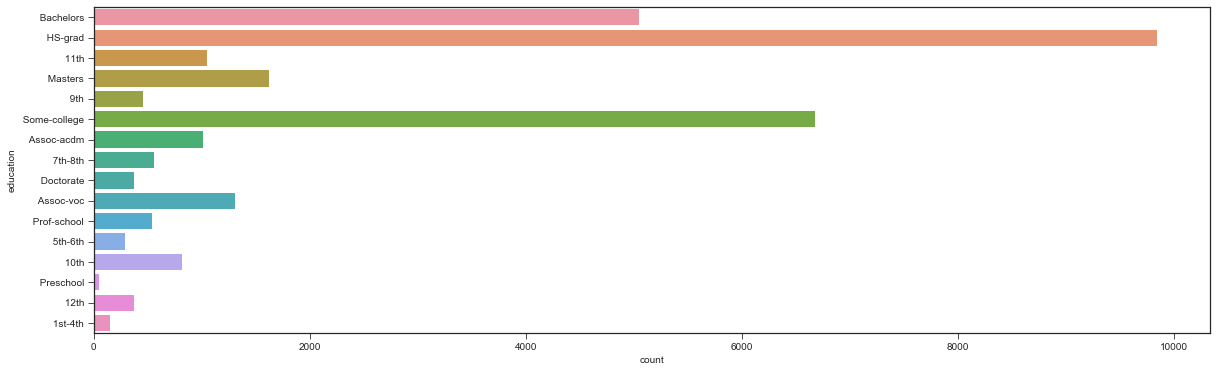

In [15]:
#Seaborn visualization of countplot 
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df_before)

Visualization clearly shows that: Bachelors nearly 5000 & Some-colleges nearly 6600.

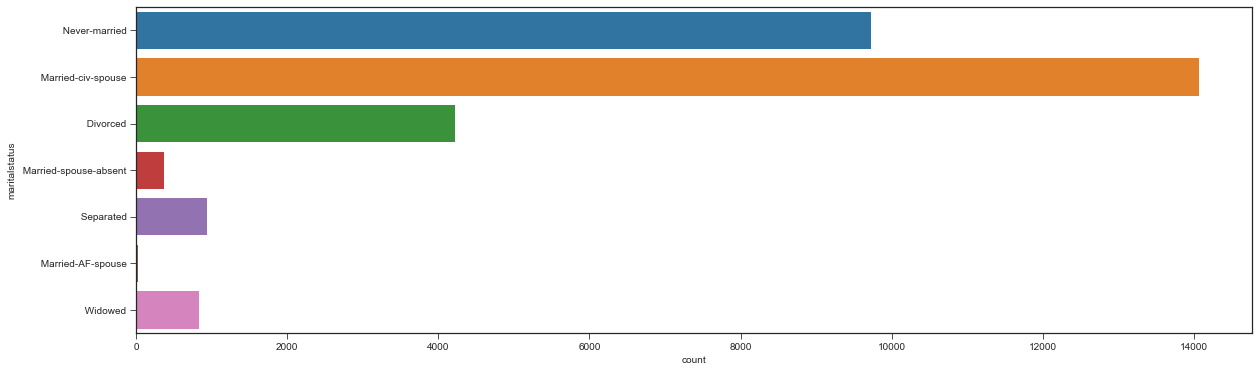

In [16]:
#Seaborn visualization of countplot 
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=df_before)

Visualization clearly shows that: Divorced nearly 4200 & Married-spouce nearly 14000.

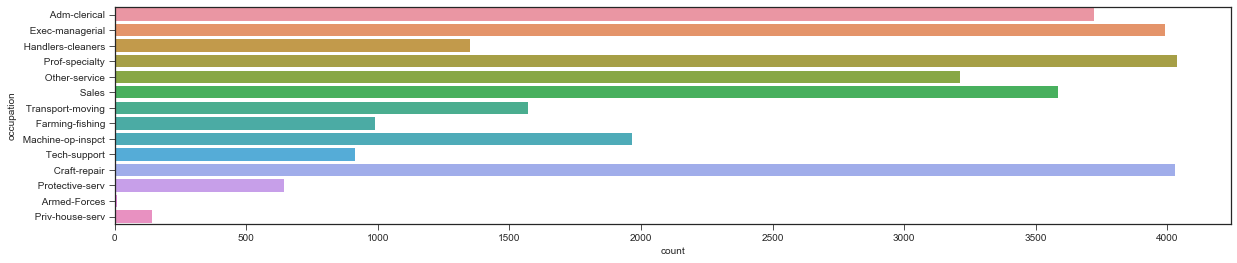

In [17]:
#Seaborn visualization of countplot 
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df_before)

Visualization clearly shows that: Craft Repair & Prof. speciality 4000 each.


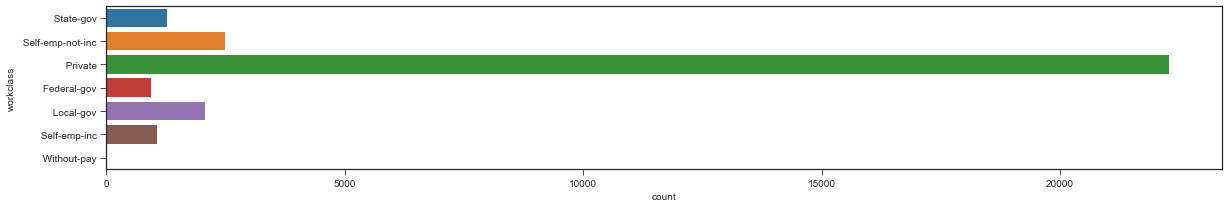

In [18]:
#Seaborn visualization of countplot
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=df_before)

Graph shows that Private workers are very high compare than others.

In [19]:
# Creating a new 'income' column using existing col. 'Salary' categoring high, low =equal 50K per annum
df_before['income'] = df_before.apply(lambda row: 1 if '>50K' in row['Salary'] else 0, axis=1)

In [20]:
#Making the age variable discretized 
df_before['age_bin'] = pd.cut(df_before['age'], 20)

In [21]:
#Import warnings library for not showing warnings at run time in cell.It takes spaces and shows in red color allergetic.
import warnings
warnings.filterwarnings('ignore')

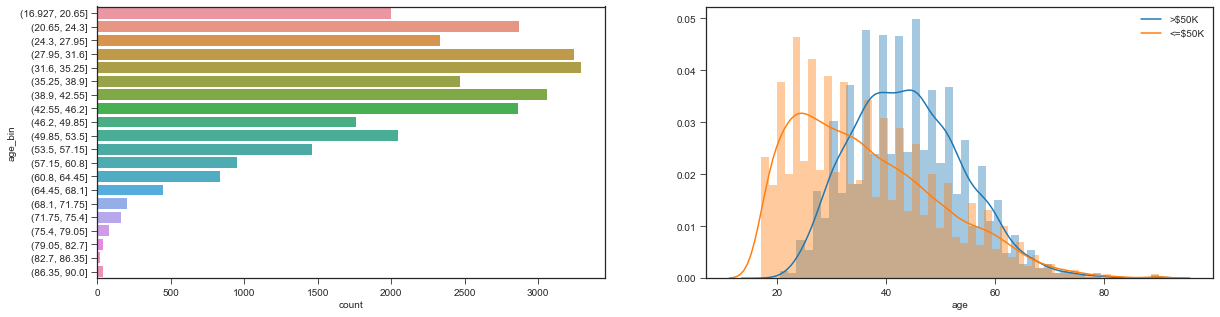

In [22]:
# Visualization of two sub-plots on the basis of age and income.
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df_before)
plt.subplot(1, 2, 2)
sns.distplot(df_before[df_before['income'] == 1]['age'], kde_kws={"label": ">$50K"})
sns.distplot(df_before[df_before['income'] == 0]['age'], kde_kws={"label": "<=$50K"})

In [23]:
#Grouped by Salary on basis of age
df_before[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


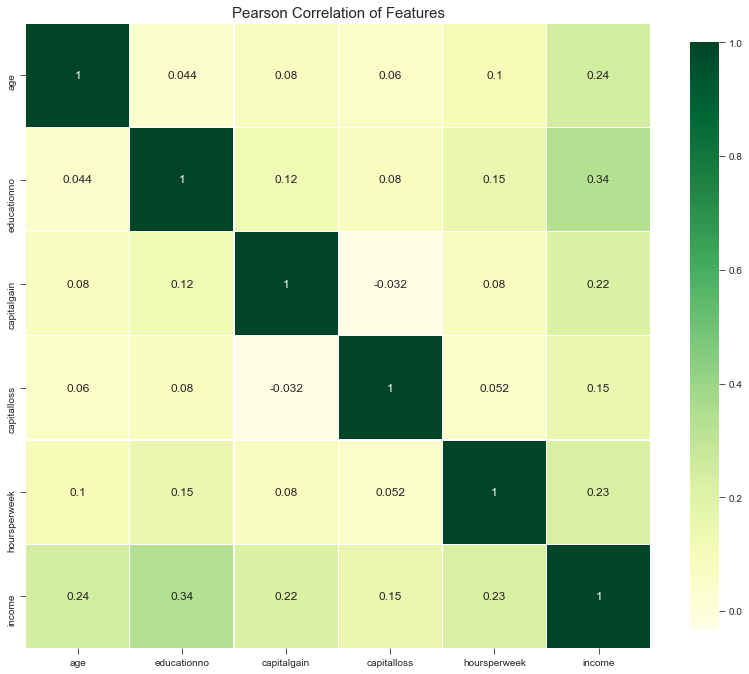

In [24]:
#correlation heatmap of dataset
def correlation_heatmap(df_before):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df_before.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_before)

Correlation heatmap color shows that (income-educationno-age) highly correlated 

In [25]:
#Droping unnecessary col.'Salary','capitalgain','capitalloss'
df_before.drop(['Salary','capitalgain','capitalloss'], axis=1, inplace=True)

In [26]:
# Getting dummies variables for categorical data's features
df_after= pd.get_dummies(df_before,columns=['sex','age_bin','workclass','education','occupation','relationship','race','native','maritalstatus'], drop_first=True)

In [27]:
#Showing top 5 records
df_after.head(10)

,age,educationno,hoursperweek,income,sex_ Male,"age_bin_(20.65, 24.3]","age_bin_(24.3, 27.95]","age_bin_(27.95, 31.6]","age_bin_(31.6, 35.25]","age_bin_(35.25, 38.9]",...,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,39,13,40,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,50,13,13,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,38,9,40,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,28,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,37,14,40,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
6,49,5,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,52,9,45,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8,31,14,50,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
9,42,13,40,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [28]:
# Using Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_after.iloc[:,1:])
df_norm.tail(10)

,educationno,hoursperweek,income,sex_ Male,"age_bin_(20.65, 24.3]","age_bin_(24.3, 27.95]","age_bin_(27.95, 31.6]","age_bin_(31.6, 35.25]","age_bin_(35.25, 38.9]","age_bin_(38.9, 42.55]",...,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
30151,0.333333,0.397959,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30152,0.666667,0.448980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30153,0.866667,0.102041,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30154,0.866667,0.397959,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30155,0.600000,0.397959,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30156,0.733333,0.377551,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30157,0.533333,0.397959,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30158,0.533333,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30159,0.533333,0.193878,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30160,0.533333,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
#feature_col=data.drop(['income'],axis=1)
#output_target=['income']
X = df_after.drop(['income'],axis=1)
Y = df_after['income']

In [31]:
#Splitting data set into followings using train_test_split functions, test size is 20%
Xtrain, Xtest , ytrain, ytest = train_test_split(X,Y,test_size=0.2, random_state=0)

In [32]:
#Performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Xtrain = sc.fit_transform(Xtrain) 
Xtest = sc.transform(Xtest) 

In [33]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 5) 
  
Xtrain = pca.fit_transform(Xtrain) 
Xtest = pca.transform(Xtest) 
  
explained_variance = pca.explained_variance_ratio_ 

In [34]:
#Importing SVM libraries 
from sklearn.svm import SVC 

In [35]:
# Create SVM classification object 
# Using kernal='linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model_linear = SVC(kernel = "linear")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
np.mean(pred_test_linear==ytest)

0.8186640145864412

In [37]:
#kernal='poly'
model_linear = SVC(kernel = "poly")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
np.mean(pred_test_linear==ytest)

0.8141886292060335

In [39]:
#kernal='rbf'
model_linear = SVC(kernel = "rbf")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.mean(pred_test_linear==ytest)

0.8276147853472567

In [41]:
#kernal='sigmoid'
model_linear = SVC(kernel = "sigmoid")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [42]:
np.mean(pred_test_linear==ytest)

0.7339632023868722

Accuracy Score of SVM model in kernal='rbf' gives highest value. So, it is significant. 

In [43]:
# Confusion matrix SVM model
confusion_matrix(ytest,pred_test_linear) 

array([[3706,  853],
       [ 752,  722]], dtype=int64)

In [44]:
pd.crosstab(ytest.values.flatten(),pred_test_linear) # confusion matrix using 

col_0,0,1
row_0,,
0,3706,853
1,752,722
